In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import numpy.linalg as lg
import networkx as nx
from networkx.algorithms import community
import warnings
warnings.filterwarnings("ignore")

print(pd.__version__)

Populating the interactive namespace from numpy and matplotlib
1.0.3


# 1-Correlation Matrix

In [2]:
corrMat=pd.read_csv('correlation_matrix.csv')
corrMat.set_index('~',inplace=True)

In [3]:
corrMat

CAT        RY      FRSX        KO        GE       AMT       MMM  \
~                                                                             
CAT    1.000000  0.813204  0.409461  0.658825  0.836983 -0.135010  0.847421   
RY     0.813204  1.000000  0.654204  0.830362  0.824965 -0.222030  0.840118   
FRSX   0.409461  0.654204  1.000000  0.479274  0.321233 -0.309352  0.621119   
KO     0.658825  0.830362  0.479274  1.000000  0.784682  0.254014  0.631075   
GE     0.836983  0.824965  0.321233  0.784682  1.000000 -0.088928  0.717226   
...         ...       ...       ...       ...       ...       ...       ...   
ATINC  0.743189  0.795395  0.380554  0.850715  0.731457  0.088733  0.614787   
EXC    0.598004  0.894321  0.607113  0.777498  0.705528 -0.141696  0.738625   
WMT    0.044871 -0.301436 -0.259476 -0.118072 -0.265498  0.523634 -0.218710   
TM     0.826421  0.730219  0.345969  0.771578  0.739784  0.122463  0.626758   
CVCO   0.618010  0.693474  0.307270  0.873190  0.710423  0.286443  0.466289   

           TWTR      NNDM      EBAY  ...      OPTT      IBKC      EXAS  \
~                                    ...                                 
CAT    0.116767  0.325133  0.022546  ...  0.246145  0.751484  0.331263   
RY     0.568570  0.639527  0.272471  ...  0.614852  0.973864  0.607158   
FRSX   0.704042  0.625794  0.599989  ...  0.694736  0.695491  0.780373   
KO     0.555509  0.256786  0.253466  ...  0.268346  0.777990  0.482263   
GE     0.223760  0.302361 -0.060189  ...  0.222281  0.775503  0.342951   
...         ...       ...       ...  ...       ...       ...       ...   
ATINC  0.313574  0.166210  0.012019  ...  0.153513  0.716616  0.207151   
EXC    0.726879  0.732707  0.408442  ...  0.734368  0.915940  0.745912   
WMT   -0.443561 -0.613902 -0.035466  ... -0.587061 -0.424050 -0.449169   
TM     0.162641  0.043483 -0.011330  ...  0.027387  0.640146  0.179447   
CVCO   0.338068 -0.014104  0.085310  ...  0.002194  0.612327  0.216288   

           PIXY       DHR     ATINC       EXC       WMT        TM      CVCO  
~                                                                            
CAT    0.177714  0.226767  0.743189  0.598004  0.044871  0.826421  0.618010  
RY     0.536182 -0.019247  0.795395  0.894321 -0.301436  0.730219  0.693474  
FRSX   0.747169 -0.173198  0.380554  0.607113 -0.259476  0.345969  0.307270  
KO     0.230273  0.297447  0.850715  0.777498 -0.118072  0.771578  0.873190  
GE     0.151446  0.228224  0.731457  0.705528 -0.265498  0.739784  0.710423  
...         ...       ...       ...       ...       ...       ...       ...  
ATINC  0.100206  0.158679  1.000000  0.580933  0.080832  0.909506  0.880989  
EXC    0.661004 -0.023234  0.580933  1.000000 -0.461606  0.471459  0.539490  
WMT   -0.574434  0.502136  0.080832 -0.461606  1.000000  0.243961  0.064448  
TM    -0.035432  0.331085  0.909506  0.471459  0.243961  1.000000  0.866211  
CVCO  -0.038989  0.391310  0.880989  0.539490  0.064448  0.866211  1.000000  

[100 rows x 100 columns]

In [4]:
corrMat.shape

(100, 100)

In [5]:
corrMat.size

10000

In [6]:
#print(corrMat.columns)

In [7]:
labels = {}
for i in range(len(corrMat.columns)):
    labels[i] = corrMat.columns[i]
print(labels)

{0: 'CAT', 1: 'RY', 2: 'FRSX', 3: 'KO', 4: 'GE', 5: 'AMT', 6: 'MMM', 7: 'TWTR', 8: 'NNDM', 9: 'EBAY', 10: 'PYPL', 11: 'CMRX', 12: 'MO', 13: 'BAC', 14: 'AGLE', 15: 'WBA', 16: 'PG', 17: 'TWST', 18: 'TMO', 19: 'RTX', 20: 'HD', 21: 'FB', 22: 'GS', 23: 'MS', 24: 'FNKO', 25: 'UNH', 26: 'RUT', 27: 'NVCN', 28: 'PFE', 29: 'JNJ', 30: 'CSCO', 31: 'NMRK', 32: 'AAPL', 33: 'FARM', 34: 'MA', 35: 'SCOR', 36: 'SCON', 37: 'FordMotor', 38: 'BMY', 39: 'HDB', 40: 'NMRD', 41: 'DVAX', 42: 'TMUS', 43: 'GOOG', 44: 'SDC', 45: 'BBI', 46: 'FDX', 47: 'V', 48: 'NVCR', 49: 'FRTA', 50: 'UPS', 51: 'UHT', 52: 'NEE', 53: 'INTC', 54: 'FNLC', 55: 'MCD', 56: 'FEYE', 57: 'AXP', 58: 'PM', 59: 'IBM', 60: 'DEO', 61: 'NFLX', 62: 'MSFT', 63: 'N225', 64: 'TSLA', 65: 'RIO', 66: 'FARO', 67: 'SLAB', 68: 'KLXE', 69: 'JPM', 70: 'TD', 71: 'MCFT', 72: 'SNP', 73: 'CIIC', 74: 'CVX', 75: 'BA', 76: 'FNJN', 77: 'VZ', 78: 'USB-PO', 79: 'DIS', 80: 'MRK', 81: 'CVS', 82: 'UVV', 83: 'TRV', 84: 'NKE', 85: 'ATEC', 86: 'LOW', 87: 'XOM', 88: 'BBQ', 8

In [8]:
C=pd.DataFrame.to_numpy(corrMat)
print(C)

[[ 1.          0.81320364  0.40946105 ...  0.04487065  0.82642145
   0.61801014]
 [ 0.81320364  1.          0.65420411 ... -0.30143581  0.73021921
   0.6934744 ]
 [ 0.40946105  0.65420411  1.         ... -0.25947566  0.34596885
   0.30726958]
 ...
 [ 0.04487065 -0.30143581 -0.25947566 ...  1.          0.24396107
   0.0644478 ]
 [ 0.82642145  0.73021921  0.34596885 ...  0.24396107  1.
   0.86621092]
 [ 0.61801014  0.6934744   0.30726958 ...  0.0644478   0.86621092
   1.        ]]


# 2-Adjacency matrix obtained from the Correlation Matrix

To get the adjacency matrix $A$  , we us he correlation matrix $C=(x_{ij})$ above such that $a_{ij}=\begin{cases} 1 &\text{if $|x_{ij}|>c$ and $i\neq j$}\\0 &\text{otherwise} \end{cases}$ 

where the value $c$ can be chosen empirically after seen the correlation matrix.

In [9]:
c=0.7
A=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        if i==j or abs(C[i,j])<c:   
            A[i,j]=0
        else:
            A[i,j]=1
print(A)      

[[0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [10]:
G=nx.from_numpy_matrix(A)

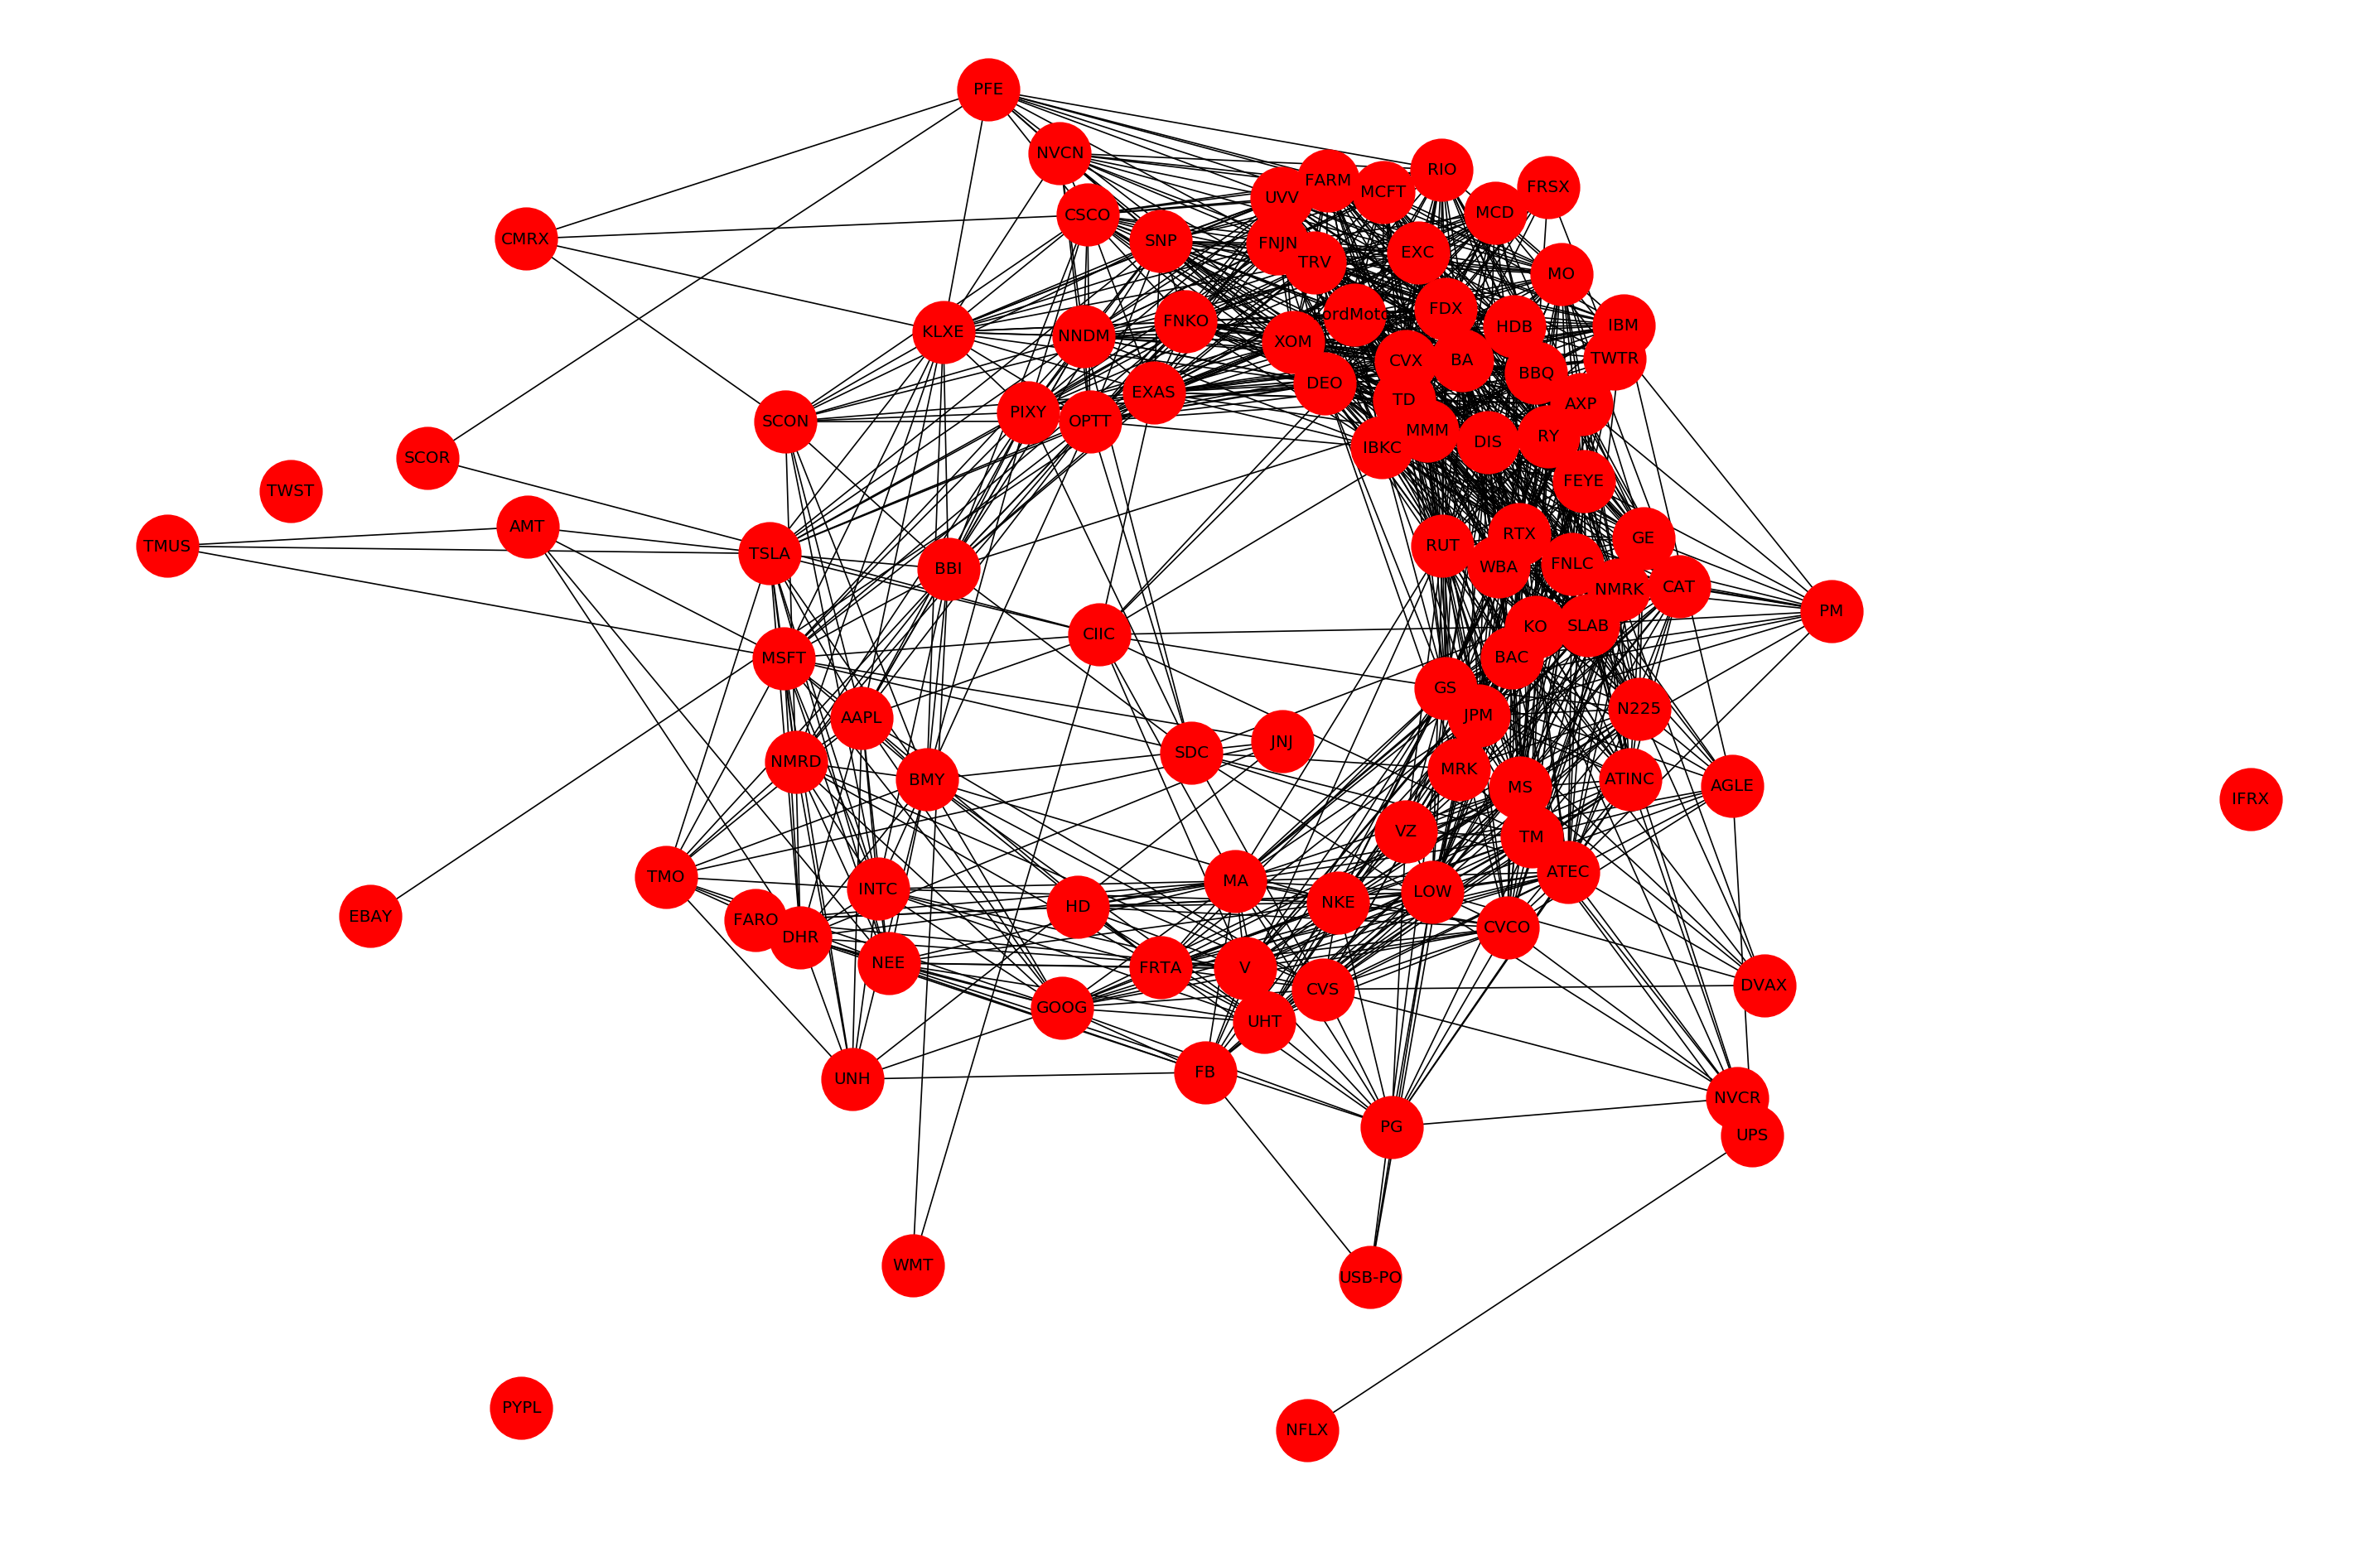

In [11]:
plt.figure(figsize=(30,20),dpi=120)
plt.clf()
pos2=nx.spring_layout(G, k=0.6, iterations = 50)
nx.draw_networkx(G,pos2,labels=labels,node_size=2000)
plt.axis('off')
plt.savefig("G.png")
plt.show()

# 3-Fragments

Let's compute the number of $P_1, P_2, P_3, C_3, C_4, T_{3,1}, C_5, S_{1,3}$ using the formula in the notes.

$P_1$ is the number of edges

In [12]:
def P1(G):
    return nx.number_of_edges(G)

In [13]:
print("The number of P1 is %d" %P1(G))  

The number of P1 is 1209


#### $P_2 = \frac{1}{2}\sum_{i}k_i(k_i-1)$ with $k_i$ is the degree of the node $i$.

In [14]:
def P2(G):
    a = 0
    k = nx.degree(G)
    n = nx.number_of_nodes(G)
    for i in range(n):
        a += k[i]*(k[i]-1)   
    return a/2

In [15]:
print("The number of P2 is %d" %P2(G))

The number of P2 is 36931


$C_3 = \frac{1}{6}tr(A^3)=\frac{1}{6}\sum_{i} \mu^3$ with $\mu$ is the eigenvalue of the adjacency matrix

In [16]:
def C3(G):
    A = nx.to_numpy_matrix(G)
    mu,v = lg.eigh(A)    #taking the eigenvalues and eigenvectors of A
    C3 = sum(mu**3)
    return C3/6

In [17]:
print("The number of C3 is %f" %C3(G))

The number of C3 is 8161.000000


$P_3 = \sum_{(i,j)\in E}(k_i-1)(k_j-1)-3|C3|$ with $E$ is the sets of edges.

In [18]:
def P3(G):
    a = 0
    k = nx.degree(G)
    n = nx.number_of_nodes(G)
    for i in range(n):
        for j in range(n):
            if (i,j) in G.edges():      #test if (i,j) is an edge, as in the above formula 
                a +=(k[i]-1)*(k[j]-1)
    return a/2-3*C3(G)

In [19]:
print("The number of P3 is %f" %P3(G))

The number of P3 is 1155391.000000


$C_4 = \frac{1}{8}(tr(A^4)-4|P_2|-2m) = \frac{1}{8}(\sum_{i}\mu^4-4|P_2|-2m)$ with $m$ is the number of edges.

In [20]:
def C4(G):
    A = nx.to_numpy_matrix(G)
    mu,v = lg.eigh(A)
    m = nx.number_of_edges(G)
    C4 = (1/8)*(sum(mu**4)-(4*P2(G))-(2*m))
    return C4

In [21]:
print("The number of C4 is %f" %C4(G))

The number of C4 is 173764.000000


$T_{3,1} = \sum_{i}t_i(k_i-2)$ with $t_i$ is the number of tirangles that involve the node $i$

In [22]:
def T3_1(G):
    F6 = 0
    t = nx.triangles(G)     #take the number of triangle that involve each node(vector quantity)
    k = nx.degree(G)
    n = nx.number_of_nodes(G)
    for i in range(n):
        F6 += t[i]*(k[i]-2)
    return F6

In [23]:
print("The number of T3_1 is %f" %T3_1(G))

The number of T3_1 is 809741.000000


$C_5 = \frac{1}{10}(tr(A^5)-30|C_3|-10|T_{3,1}|) = \frac{1}{10}(\sum_{i}\mu^5-30|C_3|-10|T_{3,1}|)$

In [24]:
def C5(G):
    A = nx.to_numpy_matrix(G)
    mu,v = lg.eigh(A)
    C5 = (1/10)*(sum(mu**5)-(30*C3(G))-(10*T3_1(G)))
    return C5

In [25]:
print("The number of C5 is %f" %C5(G))

The number of C5 is 4071996.000000


$S_{1,3}=\frac{1}{6}\sum_{i}(k_i(k_i-1)(k_i-2))$

In [26]:
def S1_3(G):
    S1_3 = 0
    k = nx.degree(G)
    n = nx.number_of_nodes(G)
    for i in range(n):
        S1_3 += k[i]*(k[i]-1)*(k[i]-2)
    return S1_3/6

In [27]:
print("The number of S1_3 is %f" %S1_3(G))

The number of S1_3 is 406607.000000


# 4-Centrality

The degree centrality of every node of the network

In [28]:
print(nx.degree_centrality(G))

{0: 0.32323232323232326, 1: 0.4141414141414142, 2: 0.15151515151515152, 3: 0.30303030303030304, 4: 0.31313131313131315, 5: 0.05050505050505051, 6: 0.4141414141414142, 7: 0.10101010101010102, 8: 0.29292929292929293, 9: 0.010101010101010102, 10: 0.0, 11: 0.04040404040404041, 12: 0.32323232323232326, 13: 0.4444444444444445, 14: 0.13131313131313133, 15: 0.30303030303030304, 16: 0.15151515151515152, 17: 0.0, 18: 0.12121212121212122, 19: 0.43434343434343436, 20: 0.09090909090909091, 21: 0.13131313131313133, 22: 0.43434343434343436, 23: 0.3434343434343435, 24: 0.32323232323232326, 25: 0.10101010101010102, 26: 0.494949494949495, 27: 0.16161616161616163, 28: 0.13131313131313133, 29: 0.05050505050505051, 30: 0.27272727272727276, 31: 0.38383838383838387, 32: 0.19191919191919193, 33: 0.32323232323232326, 34: 0.25252525252525254, 35: 0.020202020202020204, 36: 0.14141414141414144, 37: 0.4141414141414142, 38: 0.20202020202020204, 39: 0.37373737373737376, 40: 0.17171717171717174, 41: 0.080808080808080

To identify the highest centrality, we have to look the node with biggest value of degree centrality. So let's see $5\%$ of them in the picture 

In [29]:
number = int(nx.number_of_nodes(G)*0.05)  #5% percent of the number of nodes

In [30]:
#create a function who take 2 arguments: the network G and the measure of centrality
# this function print the nodes with highest centrality, plot the network and highlight them.
def centrality_plot(G ,a):        
    v = [(a[i],i) for i in a]     #create a list with the measure of centrality the first and the node the second
    l = sorted(v)                 #sort the list so that we can extract the high value of the degree centrality
    C = []
    n = nx.number_of_nodes(G)
    color = []
    for i in range(1,(number+2)):
        C.append(l[-i][1])
    for i in range(n):
        if i in C:
            color.append('r')
        else:
            color.append('cyan')
    print("the nodes with the highest centrality are :",C)
    print("They are represented by red in the picture below.")
    plt.figure(figsize= (30,20),dpi=120)
    plt.clf()
    pos=nx.spring_layout(G)
    nx.draw_networkx(G,pos2,node_color=color,labels=labels,node_size=3000)
    plt.axis('off')
    plt.show()

the nodes with the highest centrality are : [26, 91, 70, 13, 79, 22]
They are represented by red in the picture below.


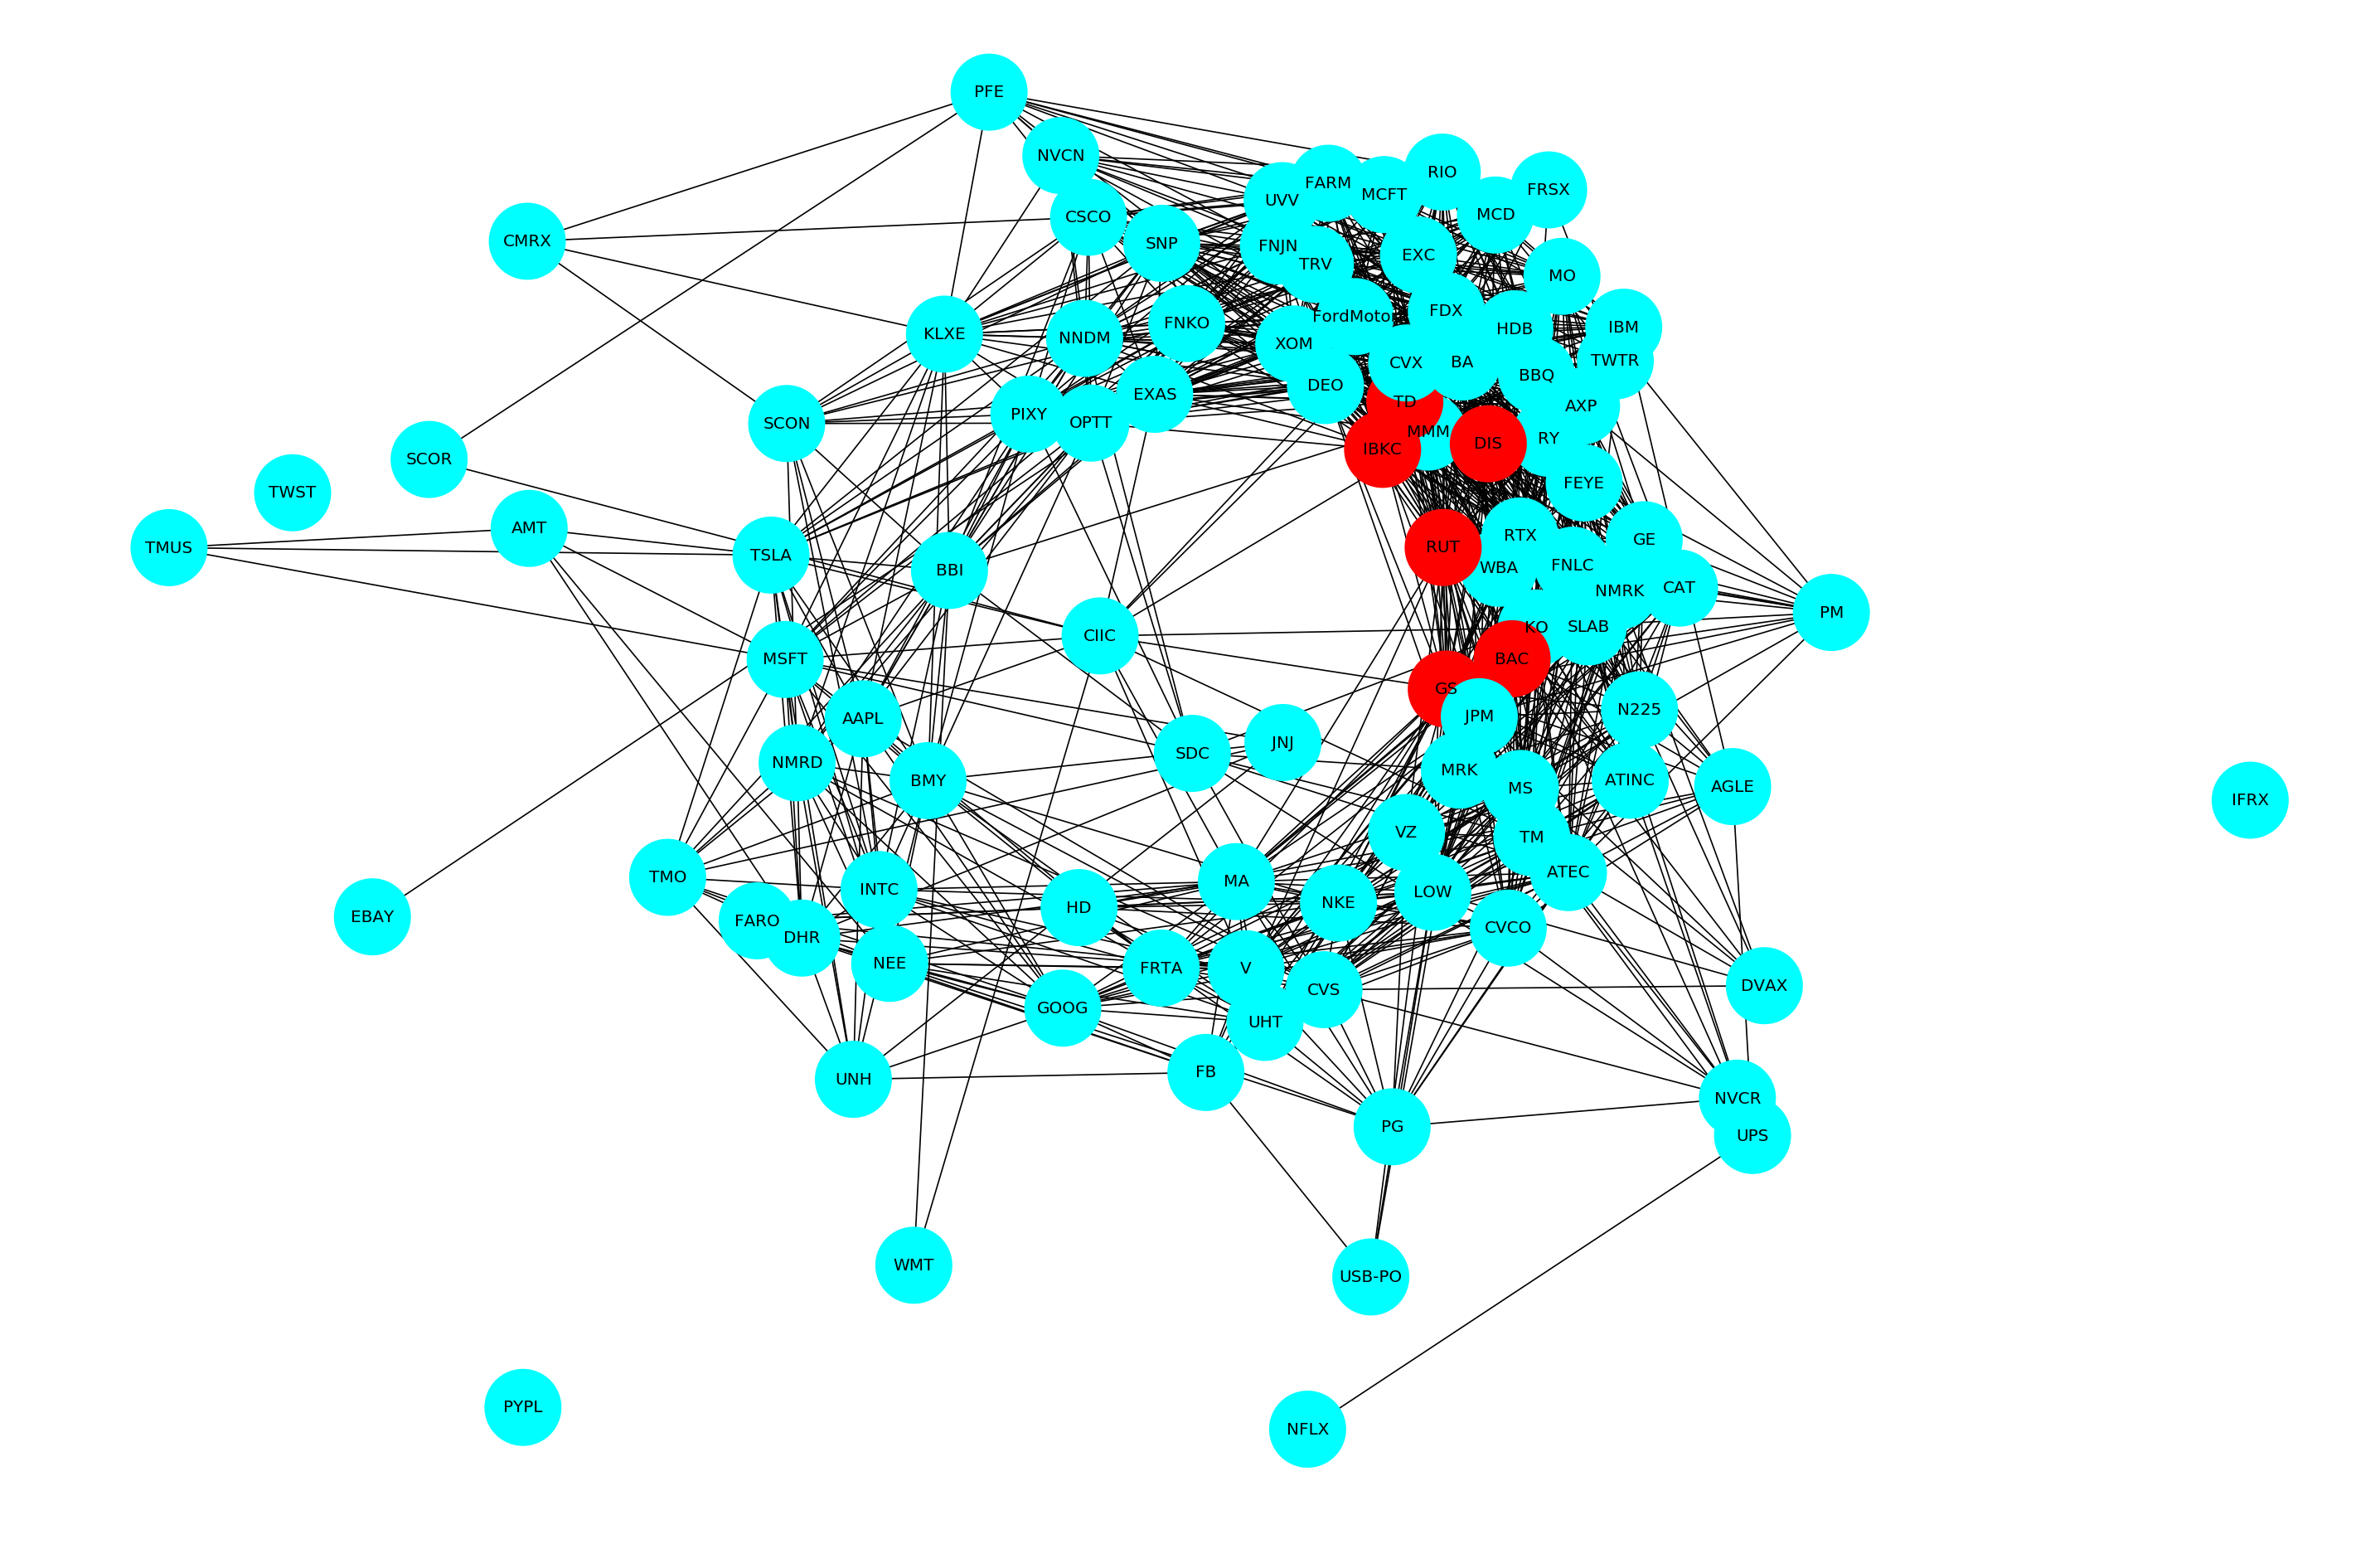

In [31]:
centrality_plot(G,nx.degree_centrality(G))

Now, let's compute and plot two others centralities of the network: one classical and one spectral.
For classical, we choose betweeness centrality, and for spectral we choose Katz centrality

In [32]:
print(nx.betweenness_centrality(G))

{0: 0.004910538321720226, 1: 0.00722851523858691, 2: 0.0012997126077580522, 3: 0.007114786206740196, 4: 0.005646293682300772, 5: 0.0005456550477985437, 6: 0.013444065058914996, 7: 0.0006729325598388571, 8: 0.01590569404982151, 9: 0.0, 10: 0.0, 11: 0.00010175010175010175, 12: 0.005359491488732454, 13: 0.024366995999160205, 14: 0.006817881574846563, 15: 0.009834351290707342, 16: 0.003126457842524699, 17: 0.0, 18: 0.0012505671112059602, 19: 0.014349975519957541, 20: 0.0007140751349516494, 21: 0.011887231801076521, 22: 0.035107069475518754, 23: 0.014270810246862081, 24: 0.018064160898020216, 25: 0.0017893055188490854, 26: 0.03311477613677583, 27: 0.0004933983706032253, 28: 0.008958766134578933, 29: 0.0, 30: 0.01171893465752785, 31: 0.011558055231014205, 32: 0.012331389595738755, 33: 0.004160350790015808, 34: 0.023277706536702473, 35: 0.00036090240068645344, 36: 0.006209786638834583, 37: 0.010093910757149818, 38: 0.02005120968126258, 39: 0.0058816648826752645, 40: 0.00767238128653357, 41: 7

the nodes with the highest centrality are : [73, 22, 26, 62, 98, 64]
They are represented by red in the picture below.


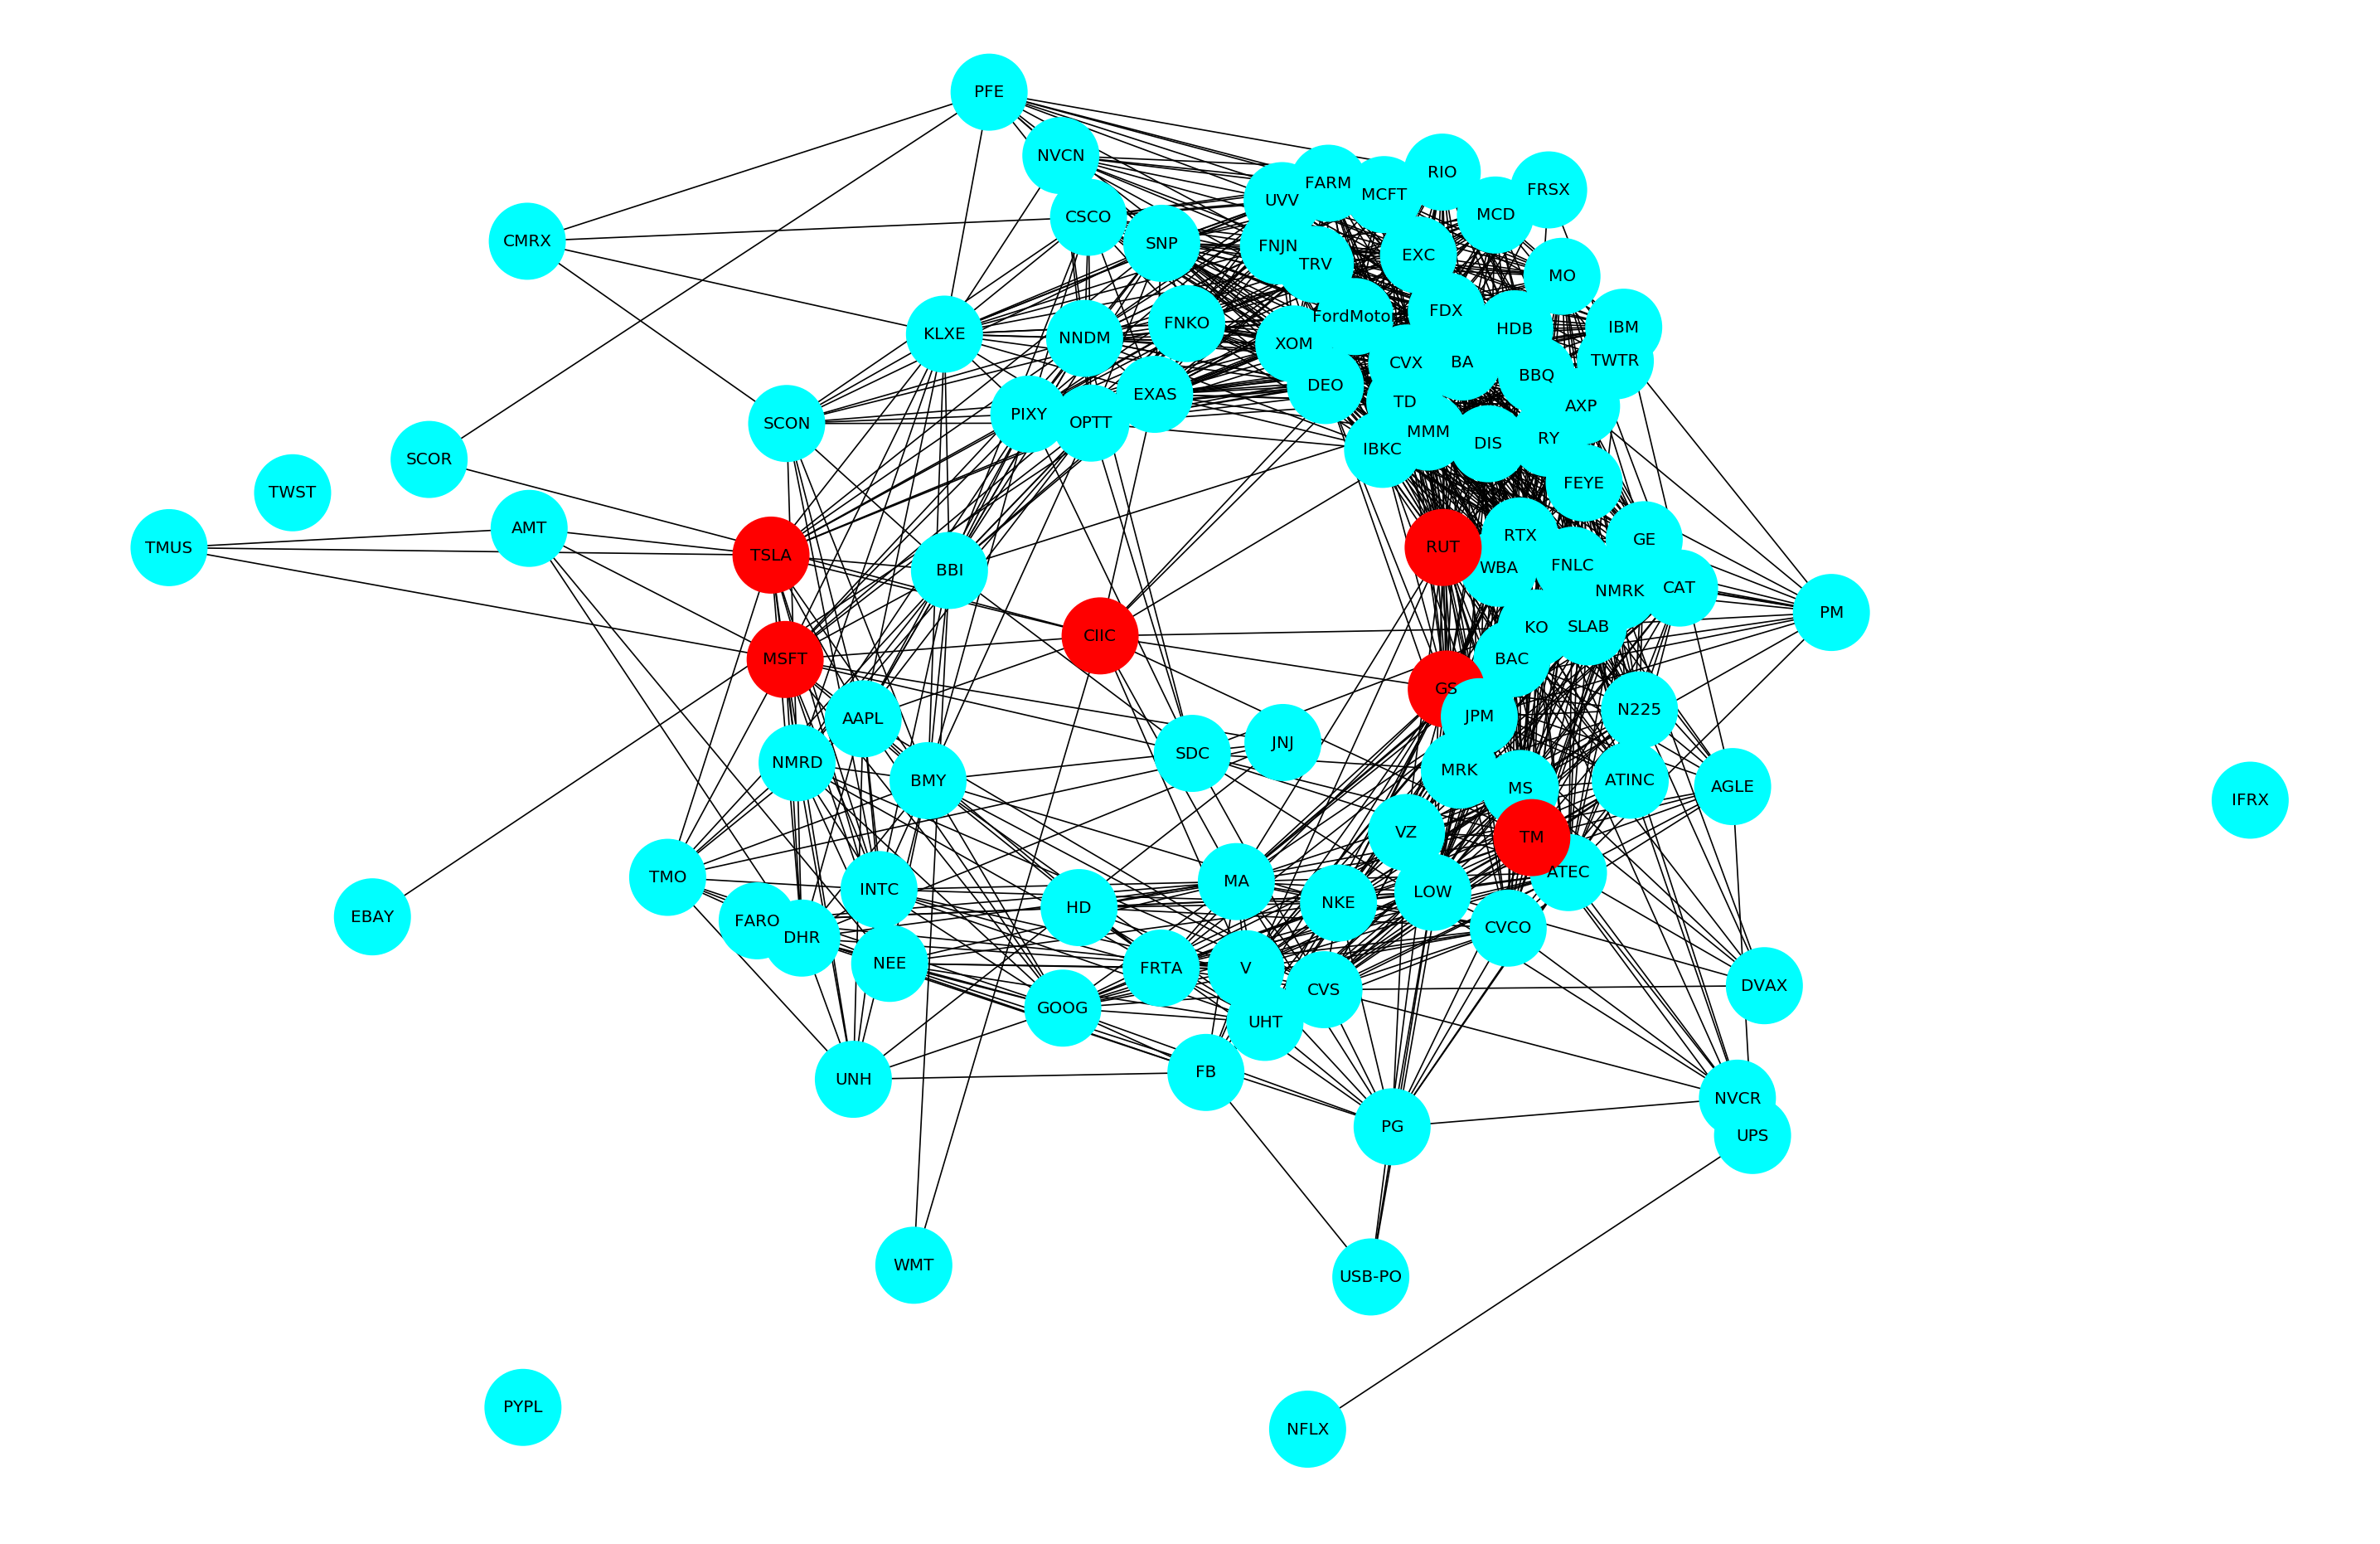

In [33]:
centrality_plot(G,nx.betweenness_centrality(G))

In [34]:
#print(nx.katz_centrality(G))

In [35]:
#plt.figure(figsize=(20,20))
#centrality_plot(G,nx.katz_centrality(G))

In [36]:
print(nx.eigenvector_centrality(G))

{0: 0.1242511213213501, 1: 0.17183999746498876, 2: 0.054727397029896575, 3: 0.11193772080763953, 4: 0.12240762006409359, 5: 0.0018037173294646062, 6: 0.16963609585676828, 7: 0.02773608721600705, 8: 0.091789936030074, 9: 0.0028021017701219913, 10: 6.960570585560289e-28, 11: 0.0061821140377642915, 12: 0.13806553755186357, 13: 0.15420156976708577, 14: 0.04207555112666436, 15: 0.1286761541144598, 16: 0.021084605950178133, 17: 6.960570585560289e-28, 18: 0.005073875733182361, 19: 0.16852073215953106, 20: 0.011207686943884658, 21: 0.023241416970191827, 22: 0.14230867267666855, 23: 0.10102695845729129, 24: 0.10966359968759545, 25: 0.0038963734620318154, 26: 0.18375665513819195, 27: 0.056486786997480054, 28: 0.03779023912598574, 29: 0.0014717859900605205, 30: 0.08964348107943315, 31: 0.14698642238368648, 32: 0.016589543351836235, 33: 0.12965558387795642, 34: 0.046392991256731575, 35: 0.0018911322286154168, 36: 0.023201273008580825, 37: 0.162754153099834, 38: 0.015811240661534873, 39: 0.15804847

the nodes with the highest centrality are : [26, 91, 70, 79, 1, 57]
They are represented by red in the picture below.


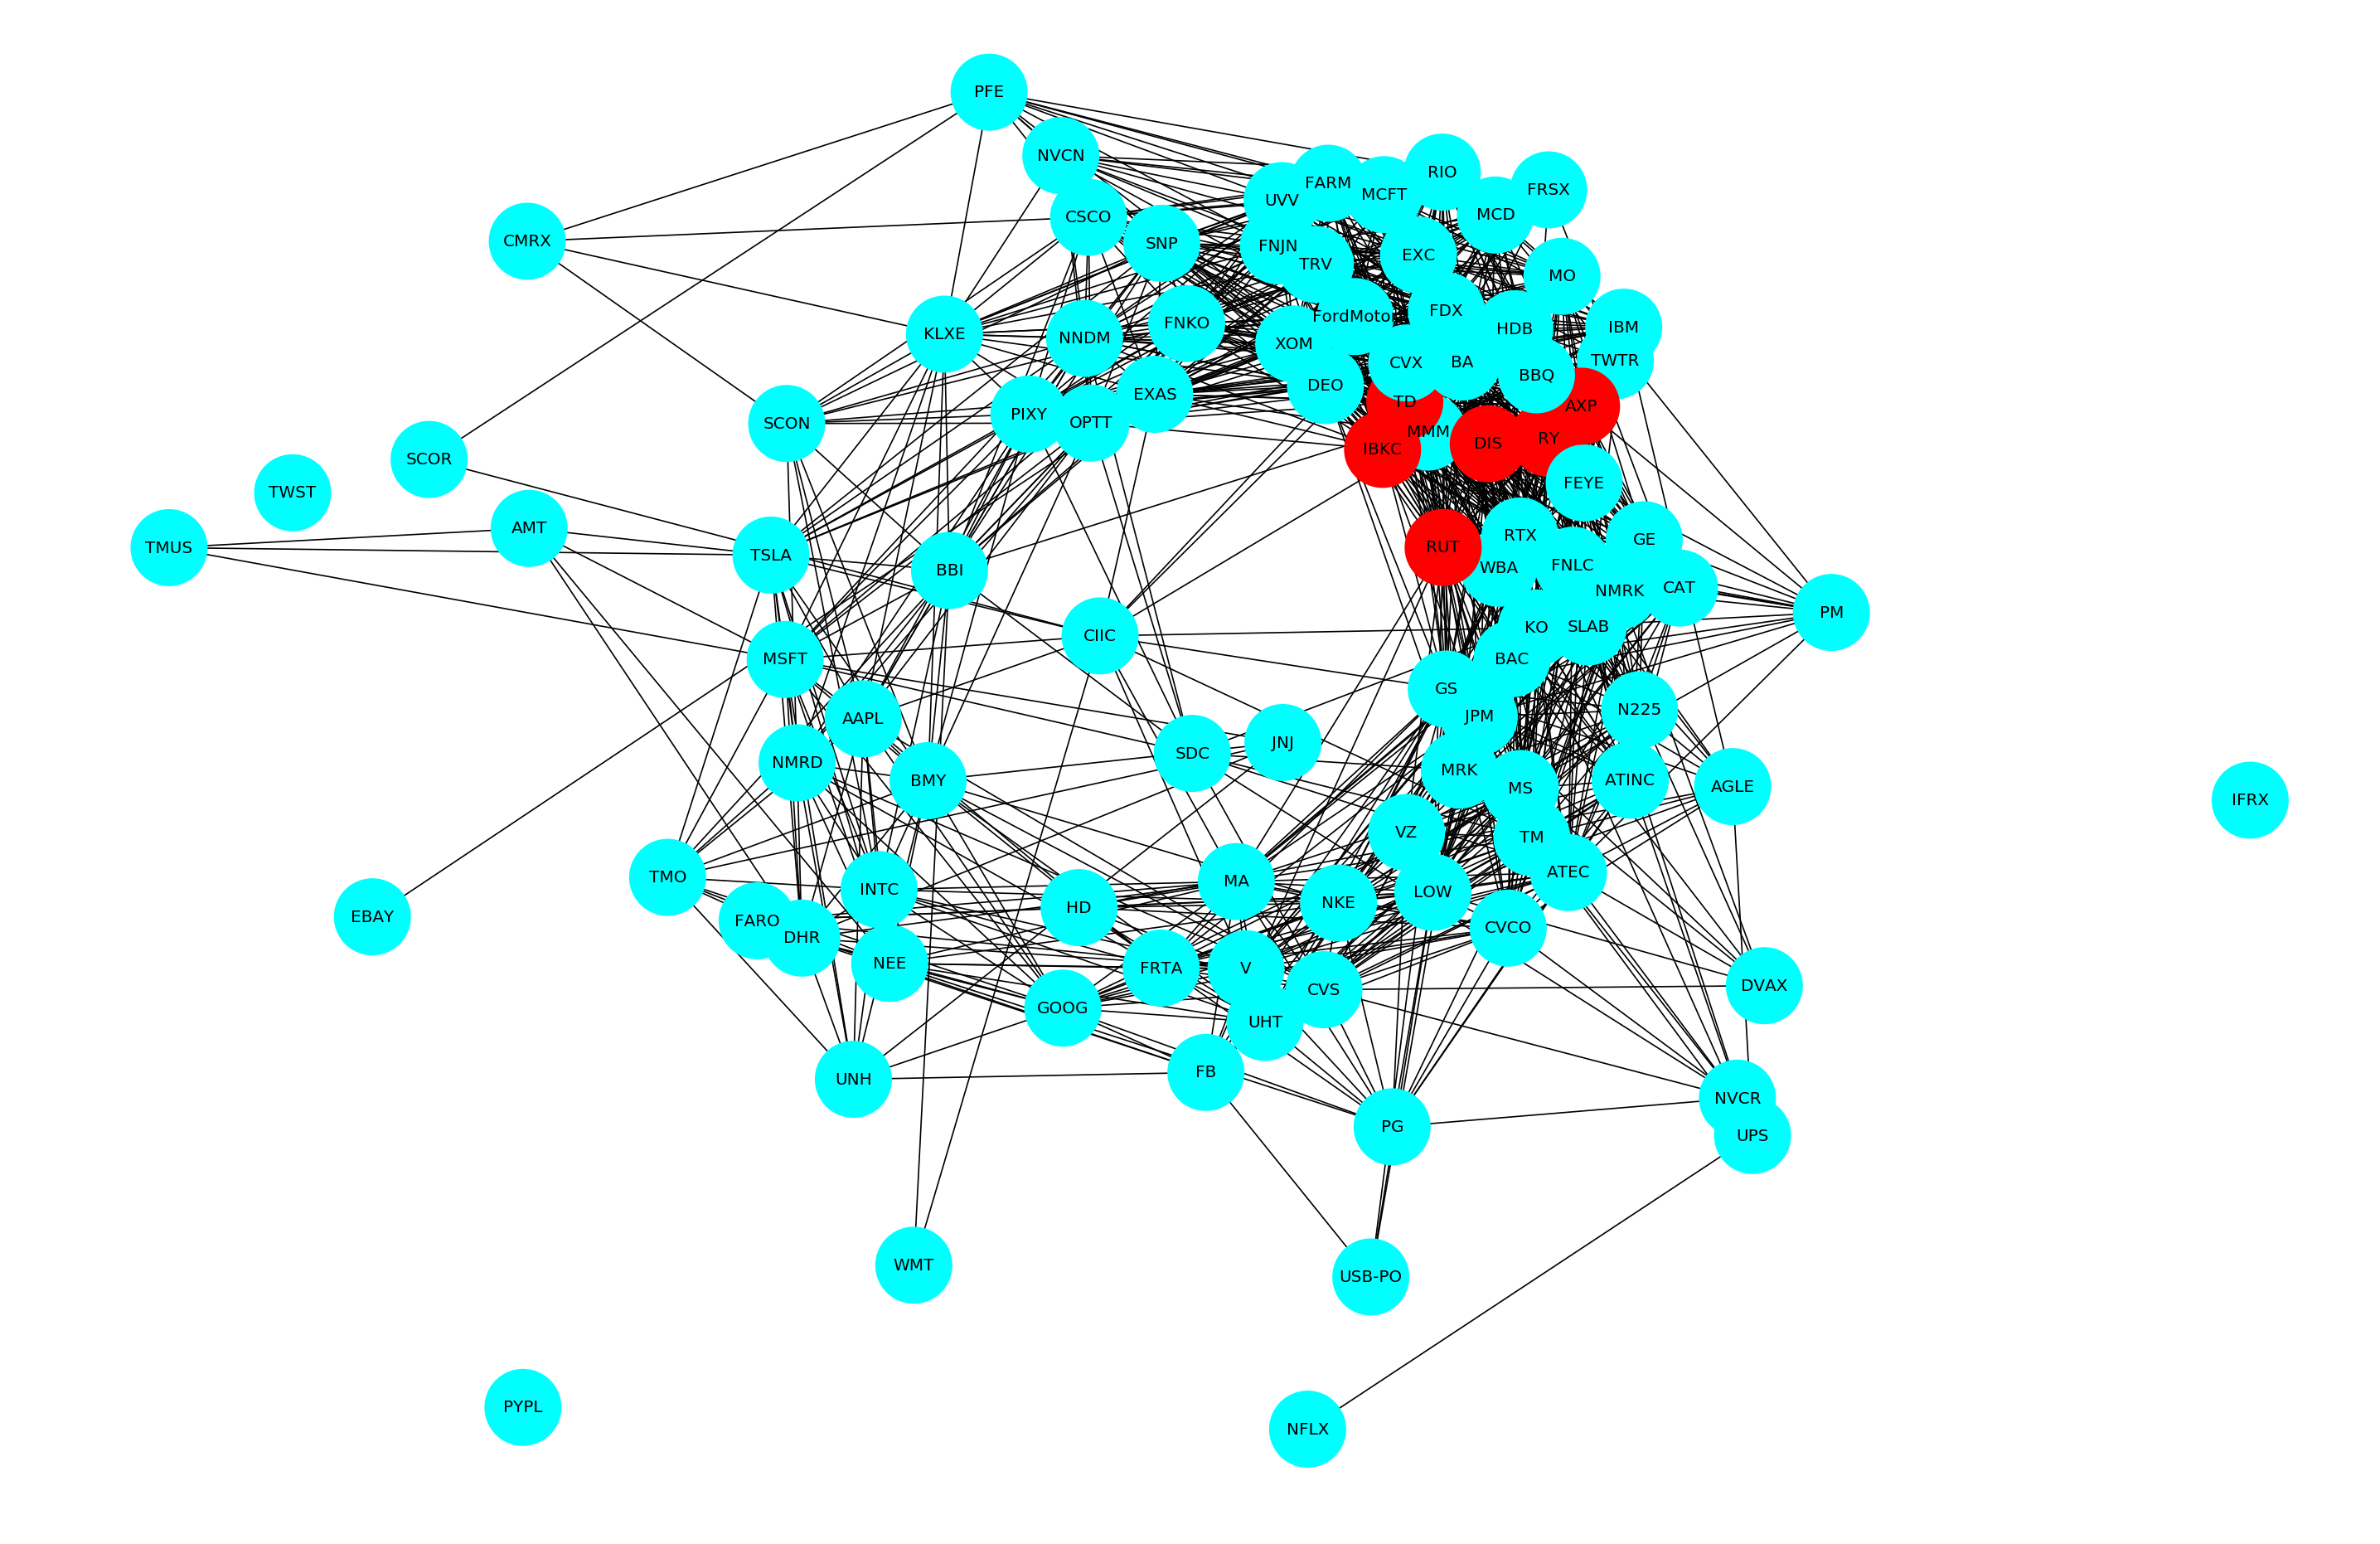

In [37]:
centrality_plot(G,nx.eigenvector_centrality(G))

In [38]:
clos_cen=nx.closeness_centrality(G)
print(clos_cen)

{0: 0.5171717171717172, 1: 0.5508337816030124, 2: 0.4475524475524476, 3: 0.5086934923000497, 4: 0.5171717171717172, 5: 0.3580419580419581, 6: 0.5508337816030124, 7: 0.41558441558441556, 8: 0.5086934923000497, 9: 0.32894314166398975, 10: 0.0, 11: 0.3512864493996569, 12: 0.5059288537549407, 13: 0.5711098717233687, 14: 0.4563279857397505, 15: 0.5031941031941032, 16: 0.4174480228291888, 17: 0.0, 18: 0.39113827349121466, 19: 0.5676274944567627, 20: 0.38787878787878793, 21: 0.45410199556541025, 22: 0.5891829689298044, 23: 0.5289256198347108, 24: 0.5114885114885115, 25: 0.3830901608679386, 26: 0.5929357266936884, 27: 0.43097643097643096, 28: 0.4212258329905389, 29: 0.3512864493996569, 30: 0.47738927738927744, 31: 0.5412262156448203, 32: 0.4631388511985527, 33: 0.5086934923000497, 34: 0.514314414866901, 35: 0.35667014977359807, 36: 0.42507264425072644, 37: 0.5508337816030124, 38: 0.46779351301964367, 39: 0.531948051948052, 40: 0.4475524475524476, 41: 0.40651052004763794, 42: 0.3324675324675324

the nodes with the highest centrality are : [26, 22, 91, 13, 70, 19]
They are represented by red in the picture below.


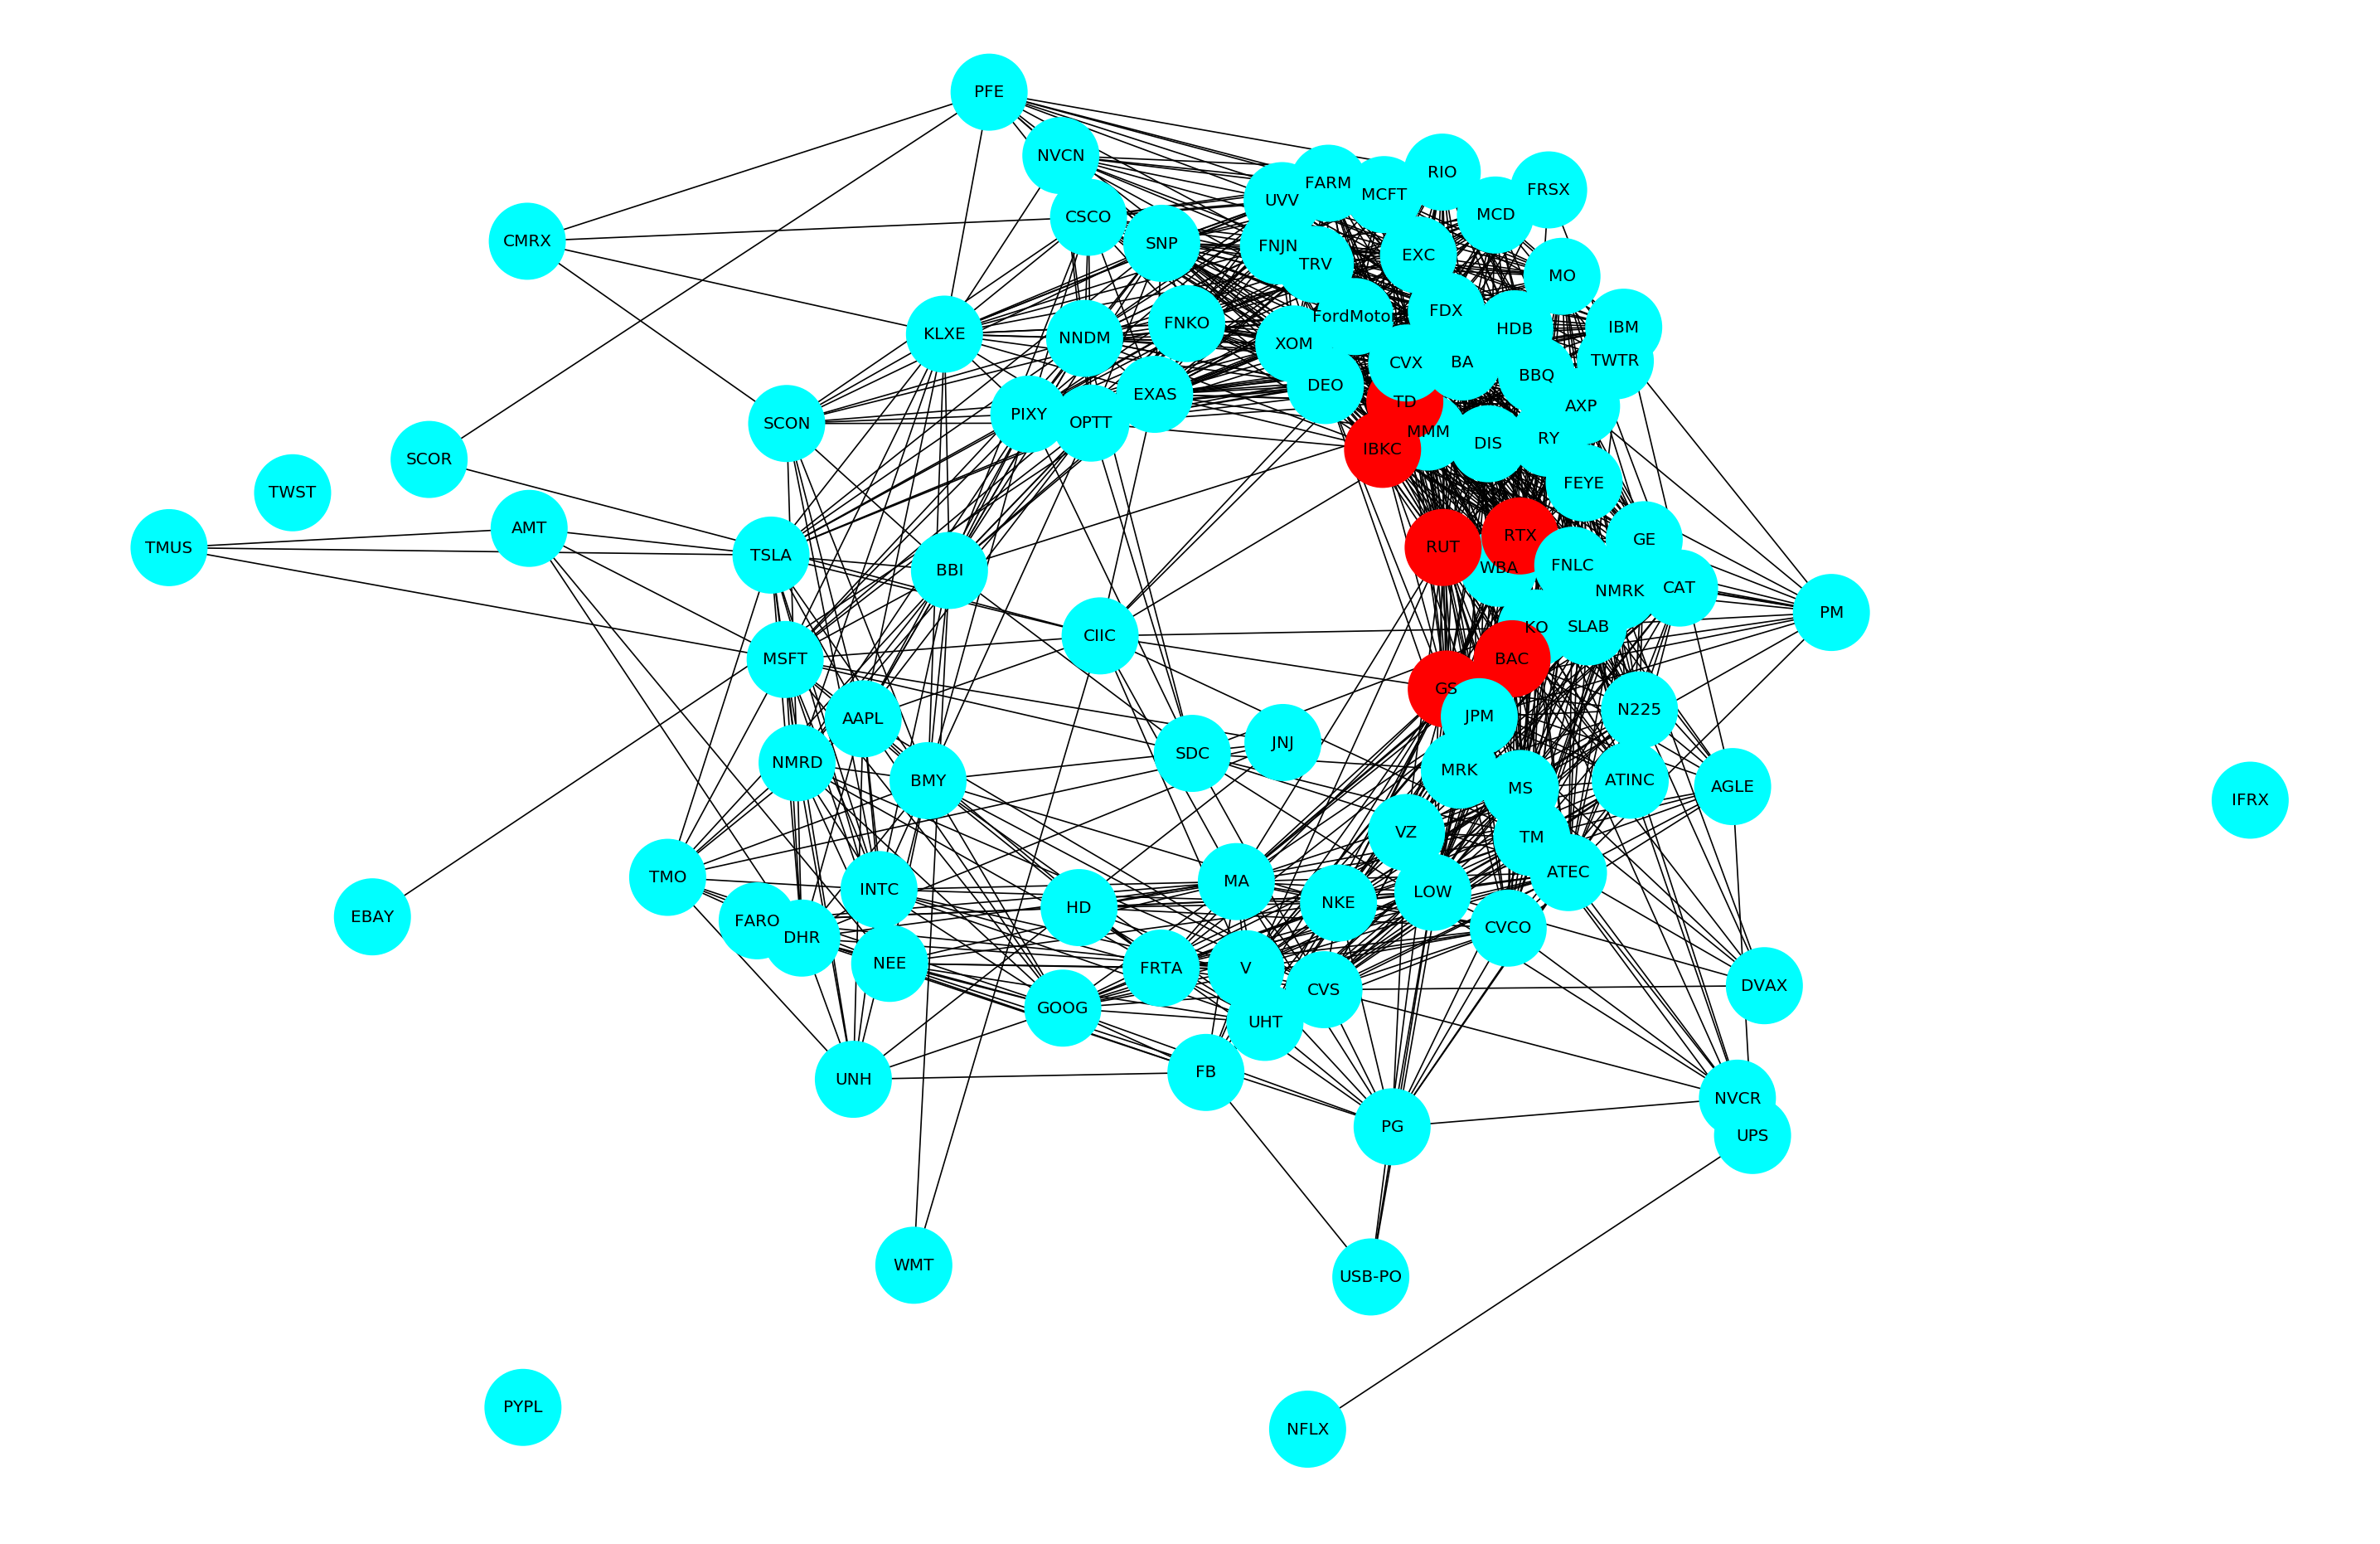

In [39]:
centrality_plot(G,nx.closeness_centrality(G))

# 3-Network motifs

We can generate an Erdos Renyi graph based on our real word graph, more precisely we can use the number of edges and nodes in our real words to create an Erdos Reyni graph.
We know that the creation of an Erdos Renyi graph need $2$ arguments: the number of nodes and the probability $p$ of creating an edge.

So First, let's find the probability $p$, we have: $\overline{m}=\dfrac{n(n-1)p}{2}$ with $\overline{m}$ is the excpected number edges and $n$ the number of nodes. Using the number of edges in our real world as the expected number of edges in the Erdos Renyi and the same number of nodes, we have : $p = \dfrac{2m}{n(n-1)}$

In [40]:
p = (2.*nx.number_of_edges(G))/(nx.number_of_nodes(G)*(nx.number_of_nodes(G)-1))
p

0.24424242424242423

The number of edges in the Erdos-Reyni graph is 1169


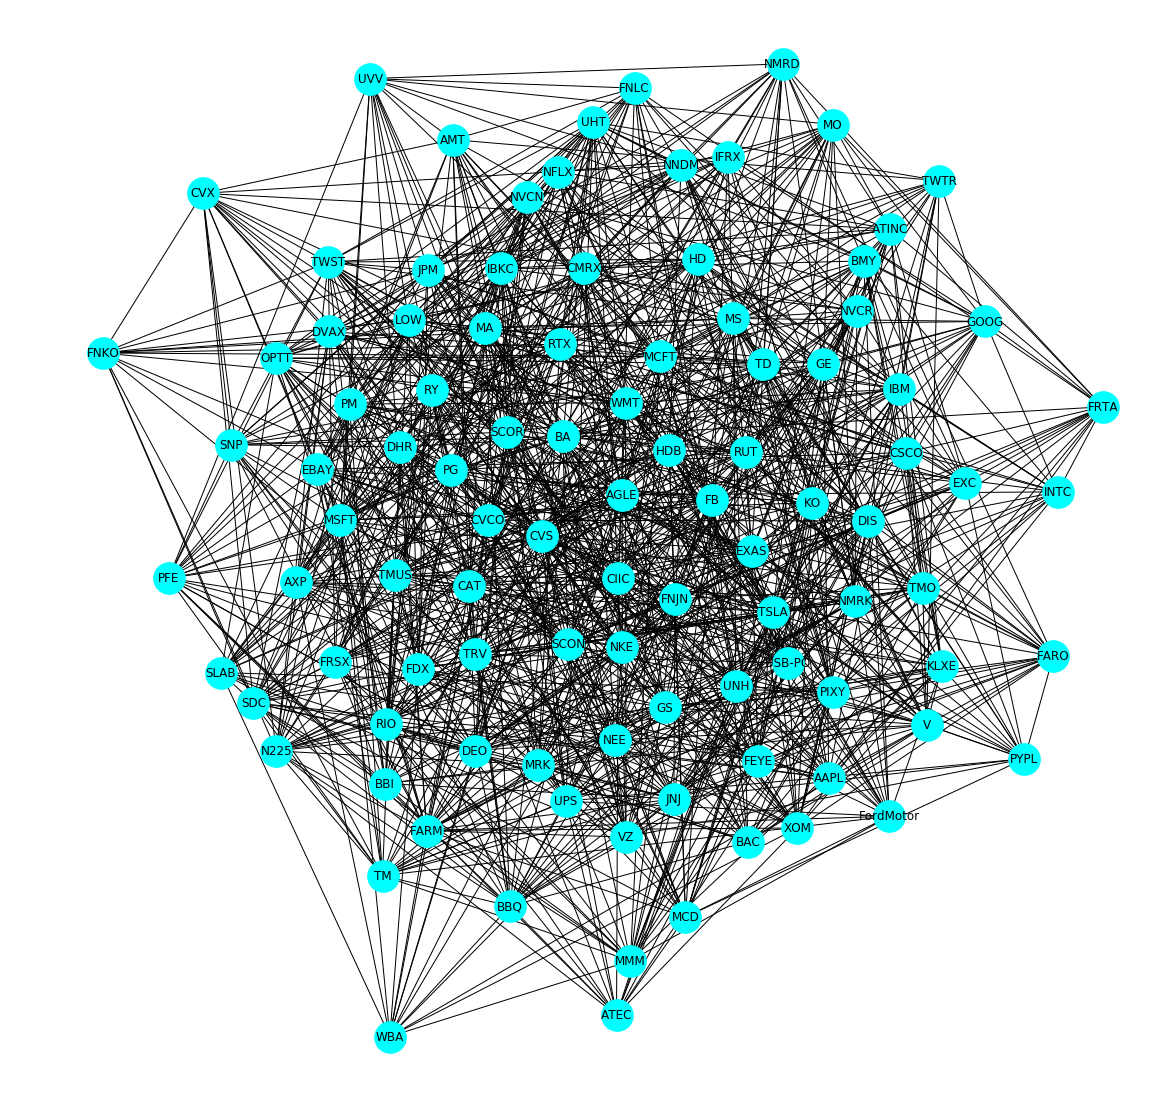

In [41]:
Erdos_Renyi = nx.erdos_renyi_graph(nx.number_of_nodes(G),p) #create the Erdos_Renyi graph
print("The number of edges in the Erdos-Reyni graph is %d" %nx.number_of_edges(Erdos_Renyi))
plt.figure(figsize= (20,20))
plt.clf()
pos=nx.spring_layout(Erdos_Renyi)
nx.draw_networkx(Erdos_Renyi,pos,node_color='cyan',labels=labels,node_size=1000)
plt.axis('off')
plt.savefig("Erdos_Renyi.png")
plt.show()

Now we can compute the number of $P_1, P_2, P_3, C_3, C_4, T_{3,1}, C_5, S_{1,3}$ in the Erdos-Renyi graph using part 1.

In [42]:
print("The number of P2 is %d" %P2(Erdos_Renyi))

The number of P2 is 26925


In [43]:
print("The number of P3 is %d" %P3(Erdos_Renyi))

The number of P3 is 613236


In [44]:
print("The number of C3 is %d" %C3(Erdos_Renyi))

The number of C3 is 2129


In [45]:
print("The number of C4 is %d" %C4(Erdos_Renyi))

The number of C4 is 35632


In [46]:
print("The number of T3_1 is %d" %T3_1(Erdos_Renyi))

The number of T3_1 is 144756


In [47]:
print("The number of C5 is %d" %C5(Erdos_Renyi))

The number of C5 is 645354


In [48]:
print("The number of S1_3 is %d" %S1_3(Erdos_Renyi))

The number of S1_3 is 203641


But we need to repeat the computation at least 50 times so we need a function to do this and record the mean of each fragments

In [49]:
#create a function who take an argument the number of times we want to repeat the process 
#and return the mean of each fragments
def frequencies(times):
    P_2 = []
    P_3 = []
    C_3 = []
    C_4 = []
    T_3_1 = []
    C_5 = []
    S_1_3 = []   
    n = nx.number_of_nodes(G)
    for i in range(times):
        G2 = nx.erdos_renyi_graph(n,p)
        P_2.append(P2(G2))
        P_3.append(P3(G2))
        C_3.append(C3(G2))
        C_4.append(C4(G2))
        T_3_1.append(T3_1(G2))
        C_5.append(C5(G2))
        S_1_3.append(S1_3(G2))
    return (mean(P_2)*1.),(mean(P_3)*1.),(mean(C_3)*1.),(mean(C_4 )*1.),(mean(T_3_1)*1.),(mean(C_5)*1.),(mean(S_1_3)*1.)

In [50]:
frequencies(50)

(29140.84,
 693475.16,
 2390.1399999999994,
 42599.99999999999,
 170948.26,
 802987.6399999997,
 231410.28)

The relative abundance for each fragment in the real world networks.
We can use: $\alpha_i = \dfrac{N_i^{real}-<N_i^{random}>}{N_i^{real}+<N_i^{random}>}$ with $N_i$ is the numbers of times $i$ appears.

In [51]:
f = frequencies(50)

In [52]:
r1 = (P2(G)-f[0])/(P2(G)+f[0])
print("The relative abundace for P2 is %f"%r1)

The relative abundace for P2 is 0.124983


In [53]:
r2 = (P3(G)-f[1])/(P3(G)+f[1])
print("The relative abundace for P3 is %f"%r2)

The relative abundace for P3 is 0.260491


In [54]:
r3 = (C3(G)-f[2])/(C3(G)+f[2])
print("The relative abundace for C3 is %f"%r3)

The relative abundace for C3 is 0.555104


In [55]:
r4 = (C4(G)-f[3])/(C4(G)+f[3])
print("The relative abundace for C4 is %f"%r4)

The relative abundace for C4 is 0.616607


In [56]:
r5 = (T3_1(G)-f[4])/(T3_1(G)+f[4])
print("The relative abundace for T3_1 is %f"%r5)

The relative abundace for T3_1 is 0.661006


In [57]:
r6 = (C5(G)-f[5])/(C5(G)+f[5])
print("The relative abundace for C5 is %f"%r6)

The relative abundace for C5 is 0.681998


In [58]:
r7 = (S1_3(G)-f[6])/(S1_3(G)+f[6])
print("The relative abundace for S1_3 is %f"%r7)

The relative abundace for S1_3 is 0.285693


# Clustering coefficient

In [59]:
Cl=nx.clustering(G)
print(Cl)

{0: 0.7237903225806451, 1: 0.7121951219512195, 2: 0.7619047619047619, 3: 0.6781609195402298, 4: 0.7182795698924731, 5: 0.8, 6: 0.6951219512195121, 7: 0.7111111111111111, 8: 0.6403940886699507, 9: 0, 10: 0, 11: 0.8333333333333334, 12: 0.7842741935483871, 13: 0.5718816067653277, 14: 0.5897435897435898, 15: 0.7885057471264367, 16: 0.6571428571428571, 17: 0, 18: 0.7878787878787878, 19: 0.646733111849391, 20: 0.7222222222222222, 21: 0.5, 22: 0.5370985603543743, 23: 0.6007130124777184, 24: 0.6471774193548387, 25: 0.7555555555555555, 26: 0.5773809523809523, 27: 0.875, 28: 0.6538461538461539, 29: 1.0, 30: 0.7008547008547008, 31: 0.6614509246088194, 32: 0.5380116959064327, 33: 0.780241935483871, 34: 0.5233333333333333, 35: 0, 36: 0.6373626373626373, 37: 0.6841463414634147, 38: 0.5157894736842106, 39: 0.7522522522522522, 40: 0.6102941176470589, 41: 0.9285714285714286, 42: 1.0, 43: 0.5476190476190477, 44: 0.38181818181818183, 45: 0.5210526315789473, 46: 0.7153846153846154, 47: 0.5666666666666667,

Average clustering coefficient

In [60]:
s=0
for i in range(100):
    s+=Cl[i]
print(s)
print(s/100)

62.506101700369264
0.6250610170036927


In [61]:
nx.average_clustering(G)

0.6250610170036927

Newman clustering coefficient 

In [62]:
#Newman=3|C3|/|P2|
C=(3*C3(G))/P2(G) 
print(C)

0.6629389943407993


Difference clustering between real-world network and random network

In [63]:
clusg=nx.clustering(G)
cluser=nx.clustering(Erdos_Renyi)

In [64]:
so=0
for i in list(clusg.values()):
    so+=i
    msum=so/len(clusg)
print(so)
print(msum)

62.506101700369264
0.6250610170036927


In [65]:
nx.average_clustering(G)

0.6250610170036927

In [66]:
nx.average_clustering(Erdos_Renyi)

0.23819185417811473

# Communities detection

In [67]:
n = len(A)
e = np.ones(n)
k = np.dot(A,e)
print(k)

[32. 41. 15. 30. 31.  5. 41. 10. 29.  1.  0.  4. 32. 44. 13. 30. 15.  0.
 12. 43.  9. 13. 43. 34. 32. 10. 49. 16. 13.  5. 27. 38. 19. 32. 25.  2.
 14. 41. 20. 37. 17.  8.  3. 21. 11. 20. 40. 21.  6. 18.  6. 20. 16. 17.
 40. 23. 42. 41. 15. 31. 42.  1. 21. 28. 19. 28.  5. 36. 25. 38. 44. 32.
 31. 14. 42. 41. 36. 16.  4. 43. 22. 21. 34. 36. 26. 32. 33. 41. 35.  0.
 30. 44. 29. 24. 15. 29. 37.  2. 34. 25.]


In [68]:
L=np.diagflat(k)-A
#print(L)

In [69]:
# Write down the Fiedler vector of G and use the signs of its elements
# to identify two clusters in the network.
un,vn=lg.eigh(L)
print(un)

[-1.06775861e-14 -4.69145824e-15  6.20133443e-15  7.95753973e-15
  8.08247429e-01  9.72516418e-01  1.79575063e+00  1.91807074e+00
  2.23255627e+00  3.48803664e+00  3.58541275e+00  3.84223877e+00
  4.31237062e+00  5.17615585e+00  5.29430575e+00  5.87992395e+00
  6.65736551e+00  7.12723037e+00  8.07984429e+00  9.20284231e+00
  1.02448545e+01  1.05018186e+01  1.09063714e+01  1.23994528e+01
  1.25621036e+01  1.29202747e+01  1.31677235e+01  1.34072591e+01
  1.44972304e+01  1.47216484e+01  1.53916584e+01  1.57117470e+01
  1.58113155e+01  1.65898904e+01  1.68389231e+01  1.73016075e+01
  1.78284298e+01  1.87531745e+01  1.97136800e+01  2.00412696e+01
  2.04299322e+01  2.07981863e+01  2.13305068e+01  2.14888877e+01
  2.20511163e+01  2.23160270e+01  2.27308047e+01  2.30508927e+01
  2.32780849e+01  2.46015256e+01  2.55537717e+01  2.59554651e+01
  2.62613199e+01  2.69037710e+01  2.78484996e+01  2.80742431e+01
  2.88867340e+01  2.94221814e+01  2.98693323e+01  2.99258585e+01
  3.05374517e+01  3.11515

In [70]:
# Find smallest nonzero eigenvalue
for i in range(n):
    if un[i] <1e-10:
        ind = i+1
ind

4

In [71]:
vn[:,ind]

array([-9.09672158e-03, -9.74350632e-03, -1.23434110e-02, -9.39042099e-03,
       -9.40381910e-03, -2.02992478e-02, -1.02765409e-02, -1.35555447e-02,
       -1.26003617e-02, -7.51289926e-02,  4.08006962e-15, -1.71550226e-02,
       -1.05150224e-02, -9.02956504e-03,  7.04743632e-03, -2.75327760e-03,
       -9.94521079e-03,  3.27515792e-15, -1.64402523e-02, -9.47251095e-03,
       -9.26782690e-03, -1.21683497e-02, -9.16906793e-03, -9.50061862e-03,
       -1.22517925e-02, -1.64531119e-02, -9.35580077e-03, -1.24180888e-02,
       -1.37937271e-02, -1.89014113e-02, -1.25472081e-02, -9.35169749e-03,
       -1.48374135e-02, -1.11614679e-02, -1.09236724e-02, -2.29464118e-02,
       -1.48021627e-02, -1.08716490e-02, -1.47643941e-02, -1.04150136e-02,
       -1.50422644e-02, -1.04329946e-02, -2.35392695e-02, -1.29542053e-02,
       -1.19355240e-02, -1.49399198e-02, -1.06144381e-02, -1.09042955e-02,
       -1.03376770e-02, -1.15126577e-02,  1.86454699e-01, -1.03982013e-02,
       -1.44728510e-02, -

In [72]:
vn[:,ind][14]

0.007047436321057227

In [73]:
#Partitioning the the network into 2 parts
#according to the signs of the smallest nonzero eigenvector.
C1=[]
C2=[]
NC3=[]
P = vn[:,ind]

print("elements of community C1")
for i in range(n):
    if P[i]<-1e-13:
        C1.append(i)
print (C1) 

print      
print("elements of community C2")
for i in range(n):
    if P[i]>1e-13:
        C2.append(i)
print (C2)

print("elements in neither community")
for i in range(n):
    if abs(P[i])<1e-13:
        NC3.append(i)
print (NC3)

elements of community C1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
elements of community C2
[14, 50, 61]
elements in neither community
[10, 17, 89]


In [74]:
#highlights of the partitioning into more communities
color=[]
for i in range(n):
    if i in C1:
        color.append('b')
    elif i in C2:
        color.append('r')
    else:
        color.append('g')

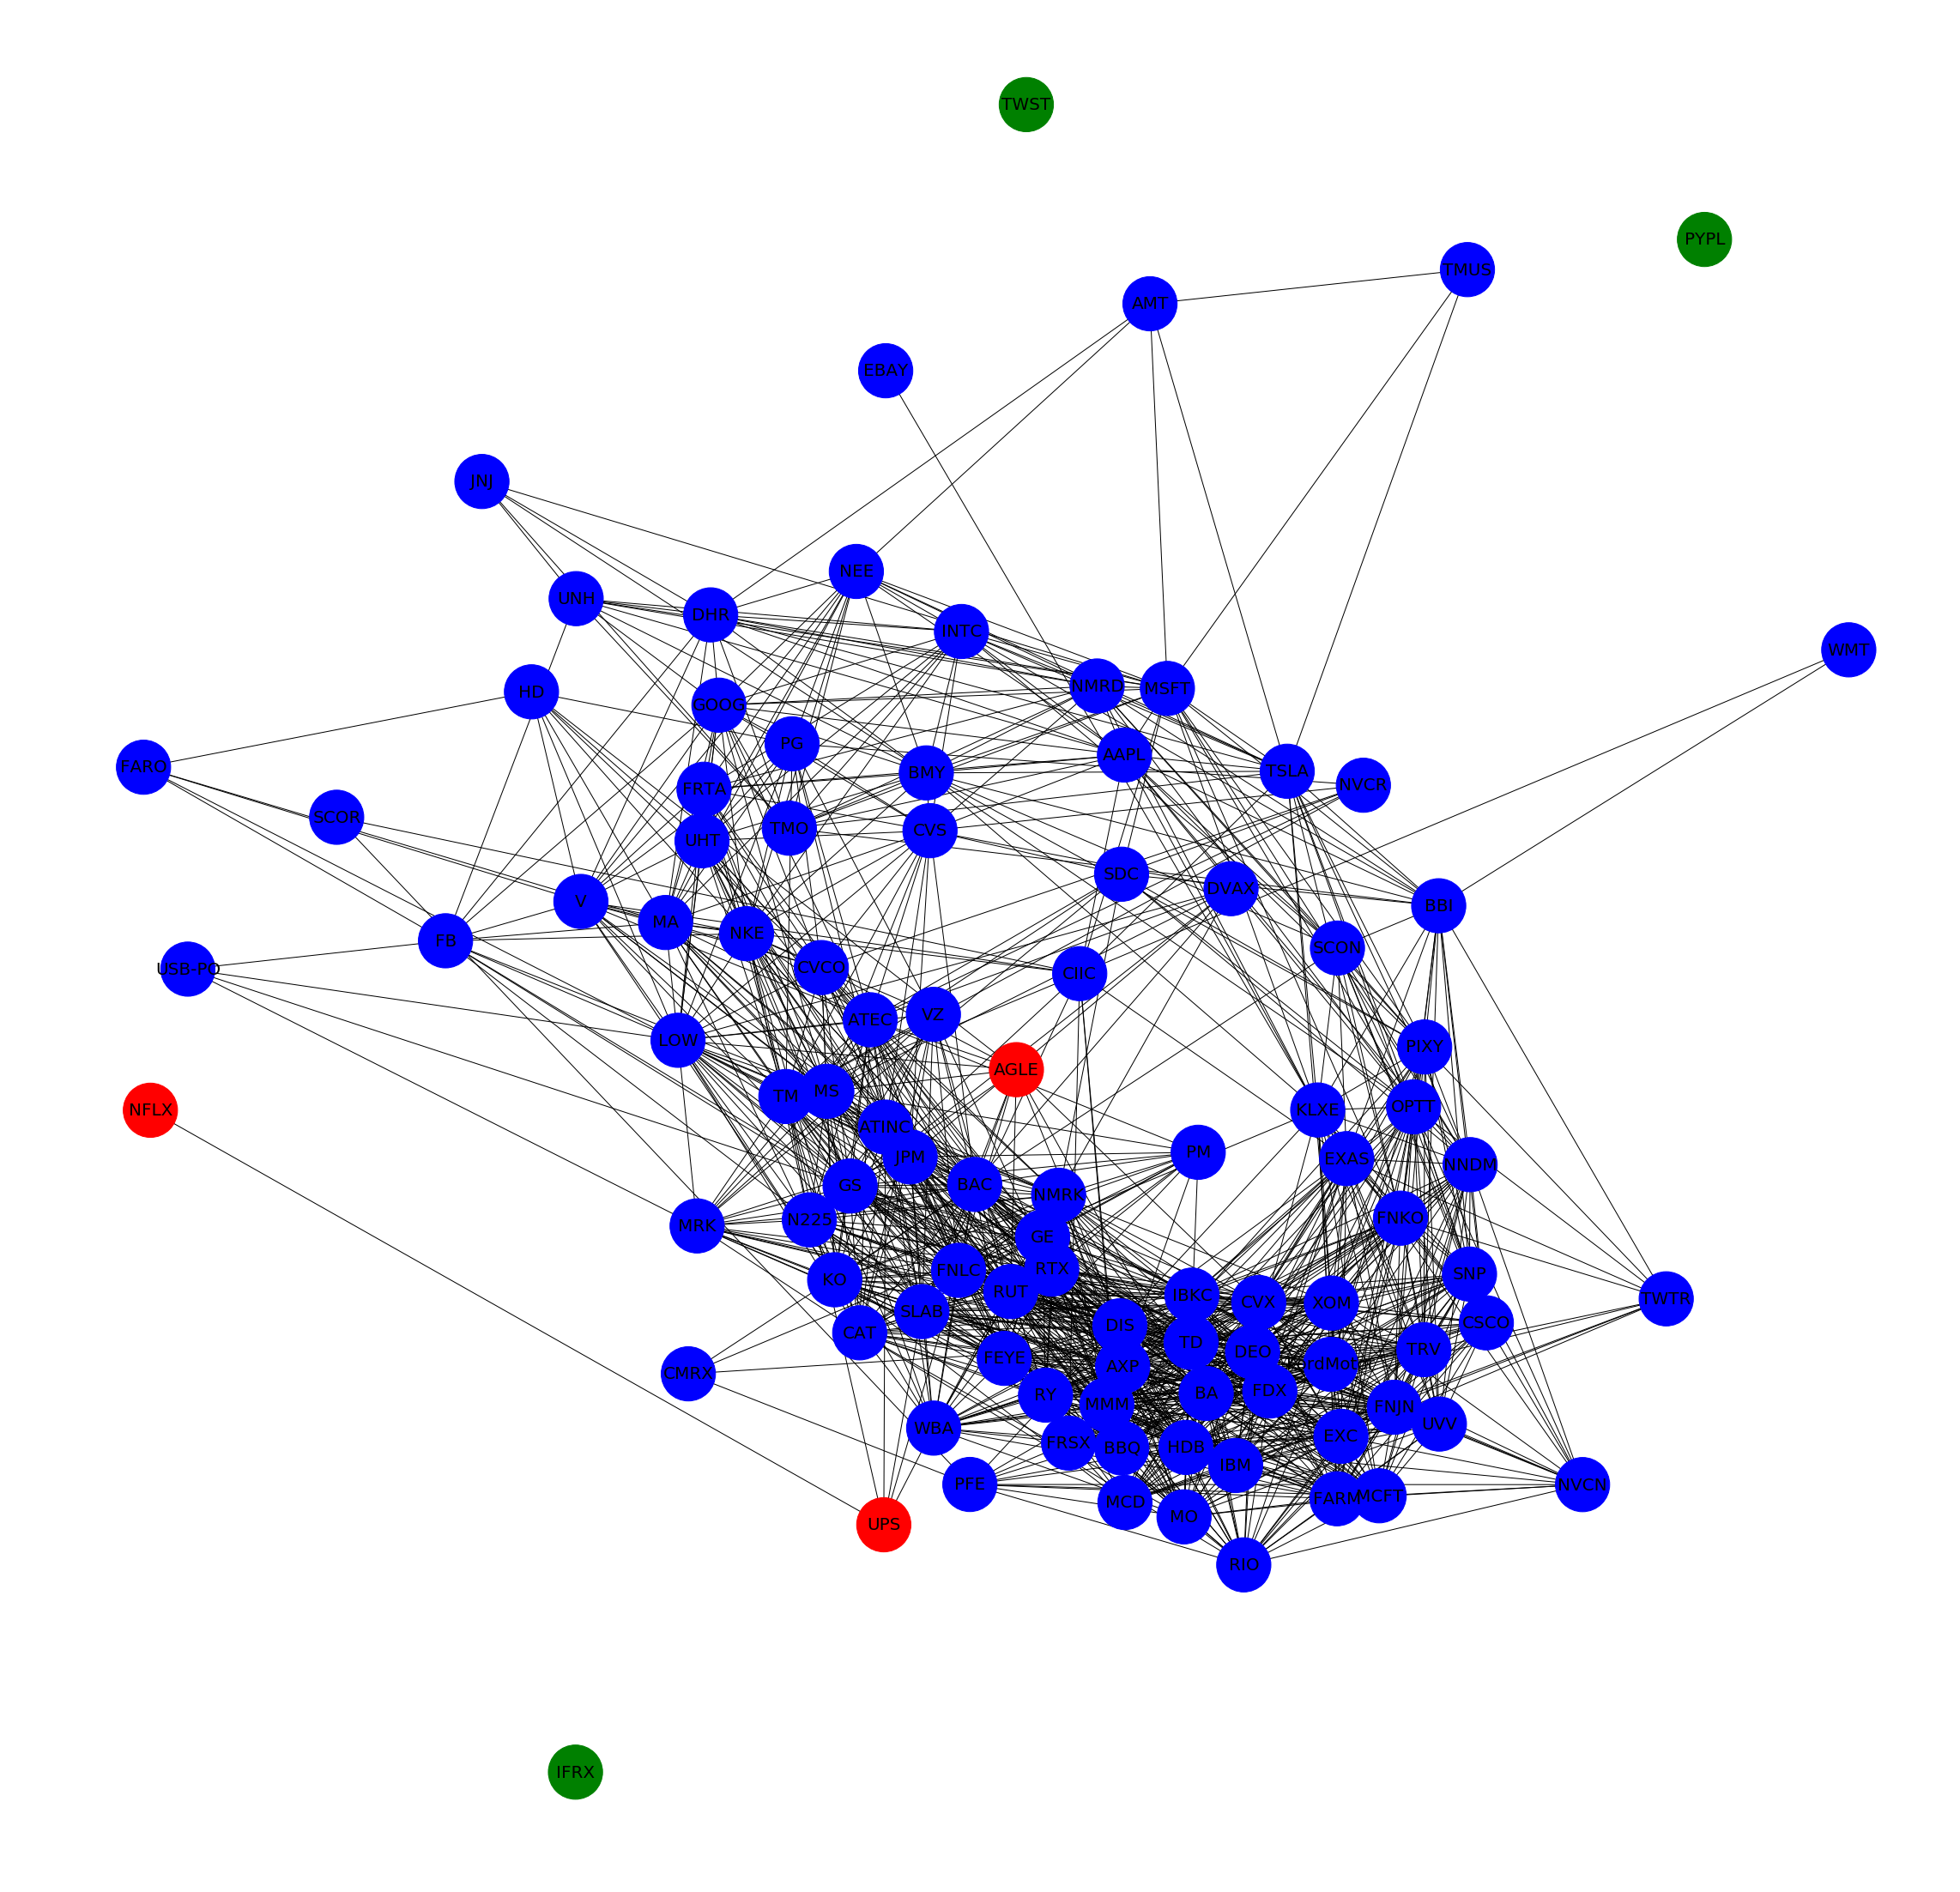

In [75]:
plt.figure(figsize=(40,40))
plt.clf()
pos3 = nx.spring_layout(G, k=0.6, iterations=50)
nx.draw_networkx(G,pos3,node_color = color,labels=labels,node_size=4000, font_size = 20)
plt.axis('off')
plt.savefig('communities.png')
plt.show()

# Assortativity coefficient

The assortativity coefficient of a network is defined as:
$r=\dfrac{|P2(G)|\left(\dfrac{|P3(G)|}{|P2(G)|}+C-\dfrac{|P2(G)|}{|P1(G)|}\right)}{3|S_{13}(G)|+|P2(G)|\left(1-\dfrac{|P2(G)|}{|P1(G)|}\right)}$

In [76]:
a1=P3(G)/P2(G)
b1=P2(G)/P1(G)
C=(3*C3(G))/P2(G)
num=P2(G)*(a1+C-b1)
d=3*S1_3(G)
e=P2(G)*(1-b1)
den=d+e
r=num/den

In [77]:
print(r)

0.4023351032679569
